In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### First Look at the data

In [2]:
full_df = pd.read_csv("data/training_set_VU_DM.csv")

In [3]:
def summary_statistics(df):
    nan_df = pd.DataFrame(df.isna().sum())
    nan_df.columns = ['count_NaN']
    describe_df = pd.DataFrame(df.describe().transpose())
    final_df = describe_df.join(nan_df)
    final_df['dtypes'] = full_df.dtypes
    final_df.sort_values(by='count', ascending=False, inplace=True)
    return final_df

In [4]:
full_df.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
srch_query_affinity_score      float64
orig_destination_distance

In [5]:
summary_statistics(full_df)

,count,mean,std,min,25%,50%,75%,max,count_NaN,dtypes
srch_id,4958347.0,166366.561096,96112.230102,1.0000,82936.000000,166507.0000,249724.000000,3.327850e+05,0,int64
price_usd,4958347.0,254.209590,16001.237061,0.0000,85.000000,122.0000,184.960000,1.972633e+07,0,float64
click_bool,4958347.0,0.044749,0.206751,0.0000,0.000000,0.0000,0.000000,1.000000e+00,0,int64
site_id,4958347.0,9.953133,7.646890,1.0000,5.000000,5.0000,14.000000,3.400000e+01,0,int64
random_bool,4958347.0,0.295900,0.456446,0.0000,0.000000,0.0000,1.000000,1.000000e+00,0,int64
srch_saturday_night_bool,4958347.0,0.502213,0.499995,0.0000,0.000000,1.0000,1.000000,1.000000e+00,0,int64
srch_room_count,4958347.0,1.110525,0.417229,1.0000,1.000000,1.0000,1.000000,8.000000e+00,0,int64
srch_children_count,4958347.0,0.350492,0.732569,0.0000,0.000000,0.0000,0.000000,9.000000e+00,0,int64
srch_adults_count,4958347.0,1.972637,0.857063,1.0000,2.000000,2.0000,2.000000,9.000000e+00,0,int64
srch_booking_window,4958347.0,37.474165,51.993411,0.0000,4.000000,17.0000,48.000000,4.920000e+02,0,int64


* high number of missing values for all rate comparisons and prop_location_score2
* price_usd has a large range, maybe delete outliers

In [6]:
def summary_statistics_booking(df, book_bool):
    df = df[df['booking_bool'] == book_bool]
    nan_df = pd.DataFrame(df.isna().sum())
    nan_df.columns = ['count_NaN']
    describe_df = pd.DataFrame(df.describe().transpose())
    final_df = describe_df.join(nan_df)
    final_df.sort_values(by='count', ascending=False, inplace=True)
    return final_df

In [7]:
booking_1 = summary_statistics_booking(full_df, 1)

In [8]:
booking_2 = summary_statistics_booking(full_df, 0)

### Closer look at target variable booking_bool

0    4819957
1     138390
Name: booking_bool, dtype: int64


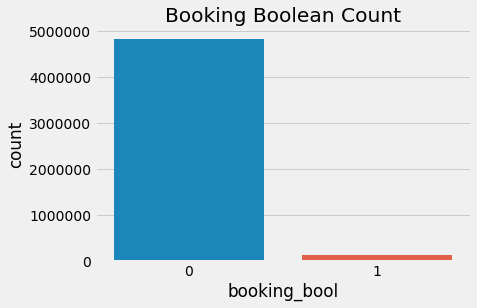

In [9]:
fig = plt.figure()
sns.countplot(x='booking_bool', data=full_df)
plt.title("Booking Boolean Count")
print(full_df['booking_bool'].value_counts())

* highly imbalanced data

### Correlations

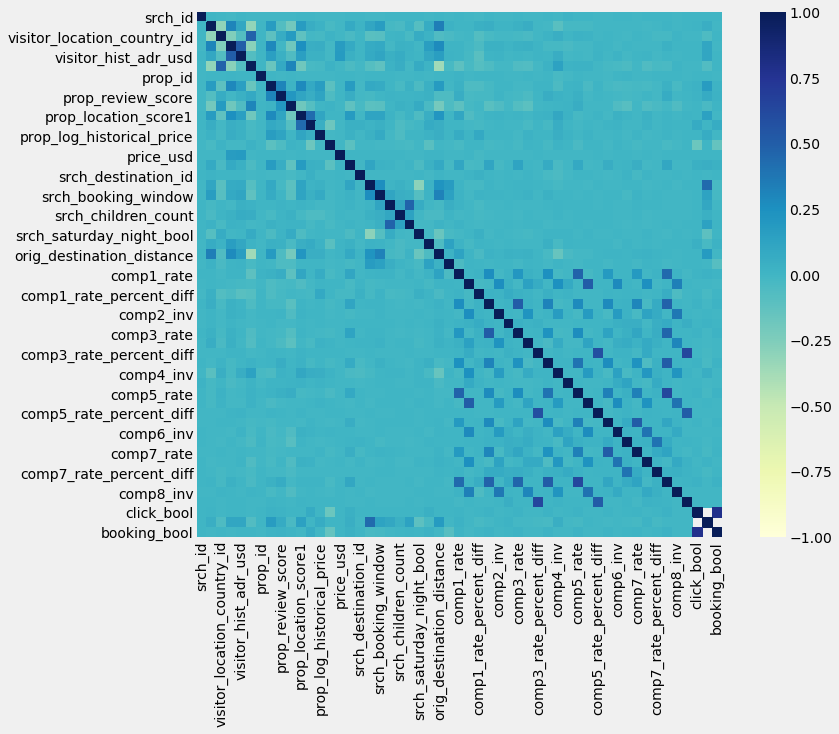

In [10]:
corrmat = full_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=-1, vmax=1, square=True, cmap="YlGnBu");

### Pairplots

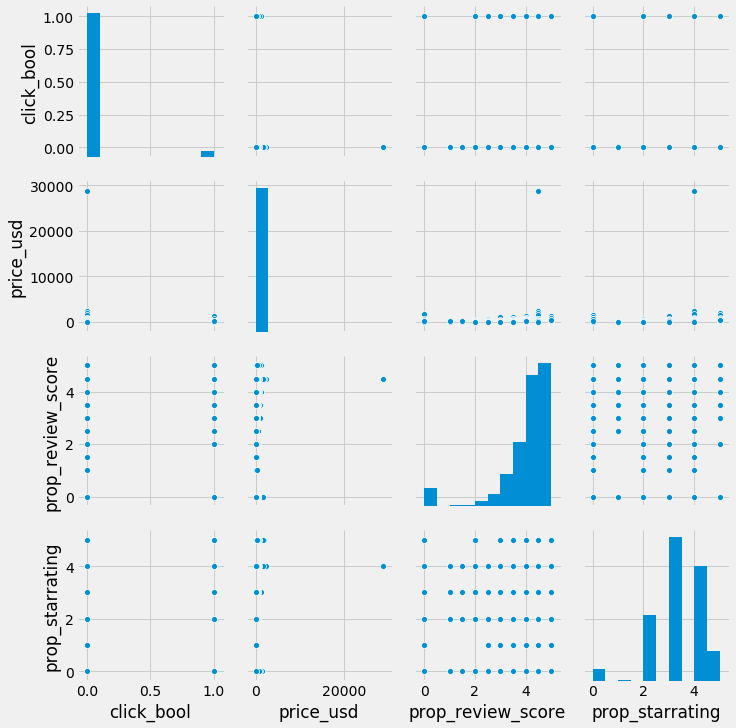

In [11]:
sample_df = full_df.sample(5000)
pairplot_variables = ['click_bool', 'price_usd', 'prop_review_score', 'prop_starrating']
sns.pairplot(sample_df[pairplot_variables], height= 2.5)
plt.show()

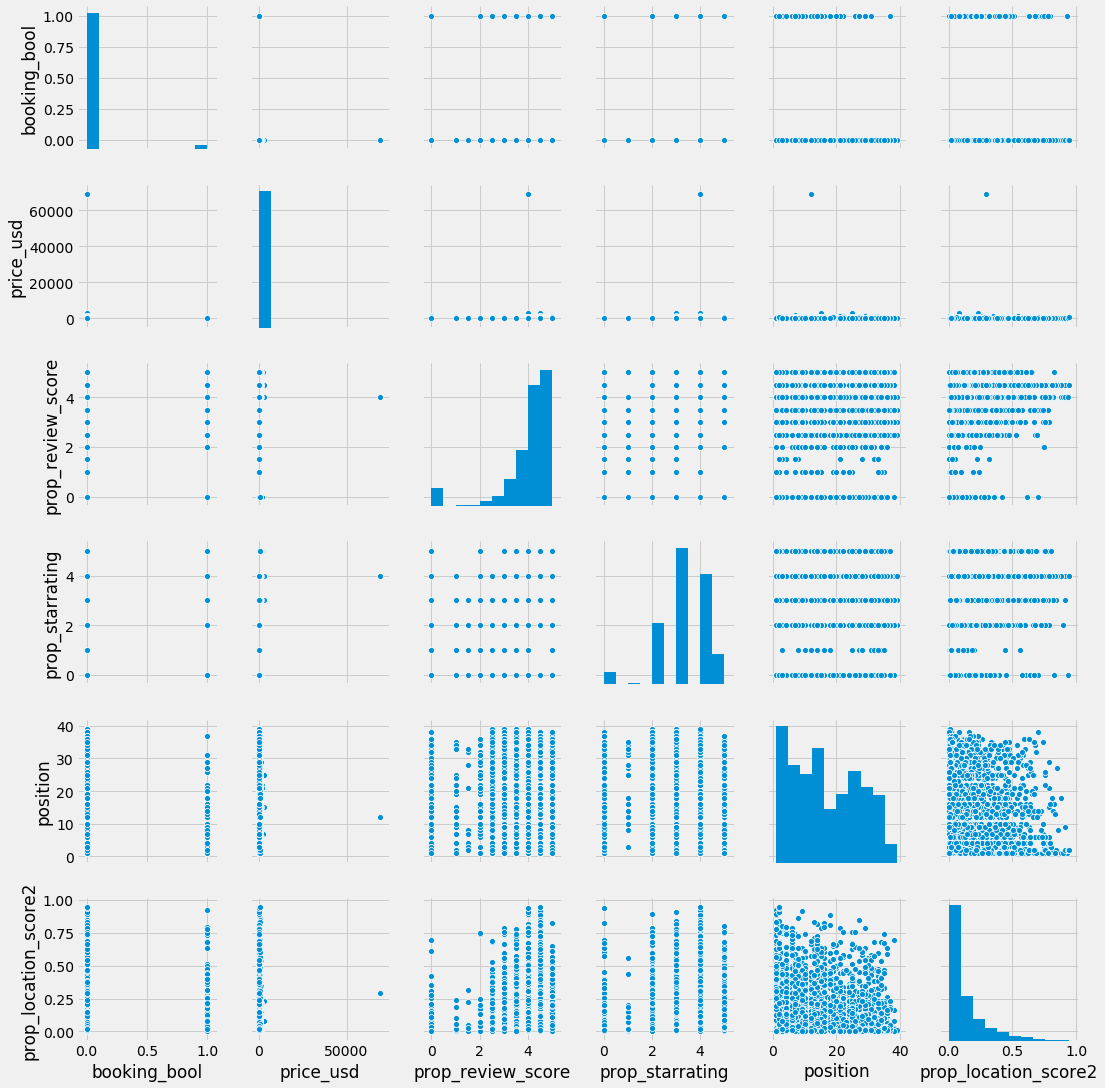

In [12]:
sample_df = full_df.sample(5000)
pairplot_variables = ['booking_bool', 'price_usd', 'prop_review_score', 'prop_starrating','position', 'prop_location_score2']
sns.pairplot(sample_df[pairplot_variables], height= 2.5)
plt.show()

### Try to fill missing values or engineer new columns

In [13]:
# delete records where price > 25000 or 1000, only 100 examples where price booked was over 1000
full_df = full_df[full_df['price_usd']<1000]

In [14]:
# try to fill missing values for prop_review_score and prop_location_score2

### prop_review_score ###
properties_df = pd.DataFrame(full_df.groupby('prop_id')['prop_review_score'].mean())
properties_df.reset_index(inplace=True)
properties_df.columns = ['prop_id', 'prop_review_score_mean']
properties_df
engineered_df = pd.merge(full_df, properties_df, how='left', left_on='prop_id', right_on='prop_id')
#display(engineered_df)
summary_statistics(engineered_df)
engineered_df['prop_review_score'].equals(engineered_df['prop_review_score_mean'])

True

In [15]:
### prop_location_score2 ###

## since prop_location_score 1 and 2 have different scales, also standardize score 1 to be between 0 and 1
full_df['prop_location_score1_standardize'] = (full_df['prop_location_score1']-full_df['prop_location_score1'].min()) / \
                                            (full_df['prop_location_score1'].max()-full_df['prop_location_score1'].min())

prop_location_df = pd.DataFrame(full_df.groupby('prop_id')['prop_location_score2'].mean())
full_df

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,prop_location_score1_standardize
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0.405444
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0.315186
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0.315186
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0,0.405444
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0,0.378223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4958342,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,77700,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0.230659
4958343,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,88083,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0.279370
4958344,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,94508,3,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,0.157593
4958345,332785,2013-06-30 19:55:18,5,219,NaN,NaN,219,128360,3,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1,157.84,1,0.279370


In [16]:
display(prop_location_df)
prop_location_df.isnull().sum()

,prop_location_score2
prop_id,
1,NaN
2,0.036100
3,0.035055
4,0.115500
5,NaN
...,...
140817,0.143200
140818,0.068500
140819,0.106100


prop_location_score2    29948
dtype: int64

* There are 129113 unique property sites
* prop_review_score is either missing completely for a site or its filled with average so filling missing values does not work there
* prop_location_score1 lies between 1 and 7
* prop_location_score2 lies betweeen 0 and 1 so two different scores (think about way to fill missing prop_location_score2)

#### most booked hotels

In [ ]:
most_booked_hotel = pd.DataFrame(full_df.groupby('prop_id')['booking_bool'].sum().reset_index())
most_booked_hotel.columns = ['prop_id', 'booking_count']
most_booked_hotel.sort_values(by='booking_count', ascending=False)

## merge data with full_df 

full_df = pd.merge(full_df, most_booked_hotel, how='left', left_on='prop_id', right_on='prop_id')
full_df

#### probability of hotel being clicked on

In [ ]:
occurences_prop_id = pd.DataFrame(full_df['prop_id'].value_counts().reset_index().sort_values(by='index'))
occurences_prop_id.columns = ['prop_id', 'occurence_count']
#occurences_prop_id
full_df = pd.merge(full_df, occurences_prop_id, how='left', left_on='prop_id', right_on='prop_id')

In [ ]:
full_df['click_prob'] = full_df['booking_count'] / full_df['occurence_count']
full_df

* added most booked hotels as column variable
* new column with # of bookings / # of occurences

# EDA with undersampled data

### Random Undersampling

In [ ]:
from sklearn.model_selection import train_test_split
# separate booking bools and keep all the booking_bools
booking_bool_0_df = full_df[full_df['booking_bool'] == 0]
booking_bool_1_df = full_df[full_df['booking_bool'] == 1]
len_bool_1 = len(booking_bool_1_df)

# find all the srch_ids for the booking_bool == 1 and filter booking_bool accordingly 
unique_srch_ids_1 = booking_bool_1_df['srch_id'].unique().tolist()
booking_bool_0_srch_ids_1 = booking_bool_0_df[booking_bool_0_df['srch_id'].isin(unique_srch_ids_1)]

train_ids, val_ids = train_test_split(unique_srch_ids_1, test_size=0.25)

undersampling_df = pd.concat([booking_bool_1_df, booking_bool_0_srch_ids_1])
display(undersampling_df)

In [ ]:
# find out if each srch_id only has one booking_bool = 1 or many
num_book_1_per_srch_id = undersampling_df.groupby('srch_id')['booking_bool'].sum().reset_index()
#undersampling_df[undersampling_df['srch_id'] == 1]
num_book_1_per_srch_id.sort_values(by='booking_bool')

* Each unique srch_id only has one booking_bool == 1 within its list

### Distribution of variables for booked hotels

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.distplot(booking_bool_1_df['position'])

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.distplot(booking_bool_1_df['prop_review_score'])

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.distplot(booking_bool_1_df['price_usd'])

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.distplot(booking_bool_1_df['prop_location_score1_standardize'])

In [ ]:
### look at position bias
fig = plt.figure(figsize=(15,6))
sns.countplot(x='position', hue='booking_bool', data=full_df)

### Correlation for selected variables

In [ ]:
selected_variables = ['position', 'prop_location_score2', 'prop_review_score', 'booking_bool']
corr_df = undersampling_df[selected_variables]
corr = corr_df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, square=True, annot=True, cmap="YlGnBu")

### Scatter plots for selected variables

In [ ]:
sample_df = undersampling_df.sample(5000)
fig = plt.figure(figsize=(15,6))
sns.scatterplot(x='prop_location_score1_standardize', y='prop_location_score2', hue='booking_bool', data=sample_df)

In [ ]:
corrmat_under = undersampling_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat_under, vmin=-1, vmax=1, square=True, cmap="YlGnBu");
print(corrmat_under.sort_values(by='prop_location_score2'))

In [ ]:
fig = plt.figure(figsize=(10,15))
sample_df = booking_bool_1_df.sample(1000)
plt.scatter(sample_df['prop_location_score2'], sample_df['position'], c=sample_df['booking_count'], cmap='Blues')
plt.title("Bubble chart by booking count")
plt.show()

### Preparation for XGBOOST

In [ ]:
df = booking_bool_1_df[booking_bool_1_df['price_usd']>1000]
df['price_usd'].sort_values()

In [ ]:
## get counts per srch_id for requiered xgboost files
full_df.sort_values(by='srch_id')
srch_counts_df = pd.DataFrame(full_df['srch_id'].value_counts().reset_index())
srch_counts_df.columns = ['srch_id', 'count']
srch_counts_df.sort_values(by='srch_id')

In [ ]:
# find a way to predict over batches of srch_id queries for xgboost
srch_counts_test_df = pd.DataFrame(full_df['srch_id'].value_counts().reset_index())
srch_counts_test_df.columns = ['srch_id', 'count']
srch_counts_test_df.sort_values(by='srch_id', inplace=True)
group_counts_test = srch_counts_test_df['count'].to_numpy()
idx_cum_sum = np.cumsum(group_counts_test)
idx_cum_sum = idx_cum_sum -1
idx_cum_sum = np.insert(idx_cum_sum, 0, 0)
idx_cum_sum

In [ ]:
start = idx_cum_sum[0]
stop = idx_cum_sum[1]
#full_df.iloc[start:stop,:]

In [ ]:
from itertools import tee, islice, chain

def current_and_next(some_iterable):
    start, stop = tee(some_iterable, 2)
    stop = chain(islice(stop, 1, None), [None])
    return zip(start, stop)

for item, nxt in current_and_next(idx_cum_sum):
    if item != 0:
        item = item + 1
    print("Start" + str(item) + " Stop " + str(nxt))